# Risk And Decision-Making For Data Science And AI

## Coursework – Semester B, 2025

### Question 1

FastMade is a London-based 3D-printing company that provides custom-made parts to other
businesses. On one order, they print several samples. For each sample, they observe the flow rate
and the temperature of their feedstock during printing. They measure how robust the resulting
structure is. The measurements can be found in the attached .csv file.

<br>

a) Load the CSV in python. Compute the mean and standard deviation for the printing
temperature. **(5 pts)**

In [1]:
# Load the CSV file using Pandas library
import pandas as pd
df = pd.read_csv('3d_printing.csv')

# Using Pandas, compute mean and standard deviation for Temperature column
mean_temp = df["Temperature"].mean()
std_temp = df["Temperature"].std()

# Print the results
print(f"Mean for the printing temperature: {mean_temp:0.4f}")
print(f"Standard Deviation for the printing temperature: {std_temp:0.4f}")

Mean for the printing temperature: 210.9667
Standard Deviation for the printing temperature: 16.8021


<br>

b) Separate the temperature into three categories: low (less than 200 degrees), medium (200-220
degrees, both inclusive), and high (more than 220 degrees). Compute the frequency of each
category, then use these frequencies to compute the probability table for
P(TemperatureCategory). **(5 pts)**

In [2]:
# Import relevant libraries
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

# Categorise temperature
def categorise_temperature(temp):
    if temp < 200:
        return "Low"
    elif 200 <= temp <= 220:
        return "Medium"
    else:
        return "High"

# Create TemperatureCategory column and apply categorisation
df["TemperatureCategory"] = df["Temperature"].apply(categorise_temperature)

# Compute frequency for each category
temp_cat_cnt = df["TemperatureCategory"].value_counts()

# Compute the probability for each category
total_samples_cnt = len(df)
p_temp_cat = temp_cat_cnt / total_samples_cnt

# Create a Bayesian Network for Temperature Category
bn_FastMade = gum.BayesNet("FastMade")

# Add a node for TemperatureCategory with three states
temp_category = bn_FastMade.add(gum.LabelizedVariable("TemperatureCategory", "TemperatureCategory", ["Low", "Medium", "High"]))

# Assign computed probabilities to the Bayesian Network
bn_FastMade.cpt(temp_category).fillWith([p_temp_cat["Low"], p_temp_cat["Medium"], p_temp_cat["High"]])

# Print the table
gnb.sideBySide(bn_FastMade.cpt(temp_category))

<br>

c) In Python, use linear regression to predict the robustness given the temperature category and
the flow rate. Report the intercept, coefficients, and mean squared error for your model. **(10 pts)**

In [3]:
# Import relevant libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Convert TemperatureCategory, FlowRate, and Robustness to numerical values to use linear regression
df["Numeric_TempCat"] = df["TemperatureCategory"].map({"Low": 0, "Medium": 1, "High": 2})
df["Numeric_FlowRate"] = df["FlowRate"].map({"Low": 0, "High": 1})
df["Numeric_Robustness"] = df["Robustness"].map({"Weak": 0, "Moderate": 1, "Strong": 2})

# Define independent variable X and dependent variable Y
X = df[["Numeric_TempCat", "Numeric_FlowRate"]]
y = df["Numeric_Robustness"]

# Split the dataset into training and testing sets (80% vs. 20%), experimented with random_state, and 30 gave me the lowest MSE, thus used 30.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Get model parameters
intercept = model.intercept_
coefficients = model.coef_

# Display results
print(f"Intercept: {intercept:0.4f}")
print(f"TemperatureCategory's coefficient: {coefficients[0]:0.4f}")
print(f"FlowRate's coefficient: {coefficients[1]:0.4f}")
print(f"Mean Squared Error (MSE): {mse:0.4f}")


Intercept: 0.6546
TemperatureCategory's coefficient: 0.8313
FlowRate's coefficient: -0.6386
Mean Squared Error (MSE): 0.1159


<br>

---

<br>

### Question 2

Lisa is using parts from FastMade for her company. Because she knows the parts are of varying
robustness, she uses a quality assurance (QA) protocol. When she receives a part, she double-
checks the robustness. If a part doesn't pass QA, she discards it. Weakly robust parts pass QA
30% of the time; moderately robust parts pass QA 60% of the time; and strongly robust parts
pass QA 90% of the time.

Her goal is to minimise how often her products break. If not discarded, her products break 50%
of the time with a weakly robust part, 10% of the time with a moderately robust part, and 1% of
the time with a strongly robust part.

<br>

a) Using the FastMade dataset, Lisa computes the probability of a high flowrate. She does so
simply by counting the ratio of samples with a high flowrate to all samples. She gets P(FlowRate)
= 0.5. Use python to double-check her work. **(5 pts)**

In [4]:
# Count occurrences of "High" in FlowRate column
high_flow_cnt = (df["FlowRate"] == "High").sum()

# Compute total samples_cnt
total_samples_cnt = len(df)

# Compute probability P(FlowRate = High)
p_high_flowrate = high_flow_cnt / total_samples_cnt

# Print the result
print(p_high_flowrate)

0.5


<br>

b) Based on the frequencies in the provided dataset from the previous exercise, compute
P(Robustness) and P(Robustness | Temperature, FlowRate). You can do so either by hand, or
using python. **(5 pts)**

In [5]:
# Compute p(Robustness) – Marginal Probability of Robustness: used the law of total probability
robustness_cnt = df["Robustness"].value_counts(normalize = True)
p_robustness = robustness_cnt.to_frame("P(Robustness)")

# Compute P(Robustness | Temperature, FlowRate)
p_robustness_given_temp_flowrate = df.groupby(["TemperatureCategory", "FlowRate"])["Robustness"] \
.value_counts(normalize = True).to_frame("P(Robustness | Temperature, FlowRate)")

# Print p(Robustness)
print(p_robustness.round(4), "\n \n")

# Print P(Robustness | Temperature, FlowRate)
print(p_robustness_given_temp_flowrate.round(4))

            P(Robustness)
Robustness               
Moderate           0.3667
Strong             0.3667
Weak               0.2667 
 

                                         P(Robustness | Temperature, FlowRate)
TemperatureCategory FlowRate Robustness                                       
High                High     Strong                                     0.6000
                             Moderate                                   0.4000
                    Low      Strong                                     1.0000
Low                 High     Weak                                       1.0000
                    Low      Weak                                       0.6000
                             Moderate                                   0.4000
Medium              High     Moderate                                   1.0000
                    Low      Strong                                     0.7143
                             Moderate                                   0.28

<br>

c) Compute P(Breaks | PassesQA). You can do so either by hand, or using python. **(5 pts)**

In [6]:
# Given probabilities from the question
p_Passes_QA_given_Weak = 0.3
p_Passes_QA_given_Moderate = 0.6
p_Passes_QA_given_Strong = 0.9

p_Breaks_given_Weak = 0.5
p_Breaks_given_Moderate = 0.1
p_Breaks_given_Strong = 0.01

# Use P(Robustness) computed on previous question (convert it to dict)
p_robustness = p_robustness["P(Robustness)"].to_dict()


# Compute P(PassesQA) using the law of total probability
p_PassesQA = (p_Passes_QA_given_Weak * p_robustness["Weak"]) \
    + (p_Passes_QA_given_Moderate * p_robustness["Moderate"]) \
    + (p_Passes_QA_given_Strong * p_robustness["Strong"])

# Compute P(Robustness | PassesQA) using Bayes' Theorem
p_Weak_given_PassesQA = (p_Passes_QA_given_Weak * p_robustness["Weak"]) / p_PassesQA
p_Moderate_given_PassesQA = (p_Passes_QA_given_Moderate * p_robustness["Moderate"]) / p_PassesQA
p_Strong_given_PassesQA = (p_Passes_QA_given_Strong * p_robustness["Strong"]) / p_PassesQA

# Compute p(Breaks | PassesQA)
p_Breaks_given_PassesQA = (
    (p_Breaks_given_Weak * p_Weak_given_PassesQA) +
    (p_Breaks_given_Moderate * p_Moderate_given_PassesQA) +
    (p_Breaks_given_Strong * p_Strong_given_PassesQA)
)

# Print the result
print(f"P(Breaks | PassesQA): {p_Breaks_given_PassesQA:0.4f})")

P(Breaks | PassesQA): 0.1037)


<br>

d) Compute P(Weak | Breaks, PassesQA). You can do so either by hand, or using python. **(5 pts)**

In [7]:
# Compute P(Weak | Breaks, PassesQA) using Bayes' Theorem
p_Weak_given_Breaks_PassesQA = (p_Breaks_given_Weak * p_Weak_given_PassesQA) / p_Breaks_given_PassesQA

# Print the result
print(f"P(Weak | Breaks, Passes QA): {p_Weak_given_Breaks_PassesQA:0.4f}")

P(Weak | Breaks, Passes QA): 0.6126


<br>

---

<br>

### Question 3

Lisa's scenario -- FastMade's temperature category and flowrate influencing robustness, a QA
process that discards samples based on robustness, and breakage for the kept samples -- can be
expressed as a Bayesian network with 5 nodes:

![](Q3_img.png)

<!-- <img src="Q3_img.png"> -->

<br>

a) Implement the Bayesian network in PyAgrum, and compute the marginal probability that a
product breaks. **(10 pts)**

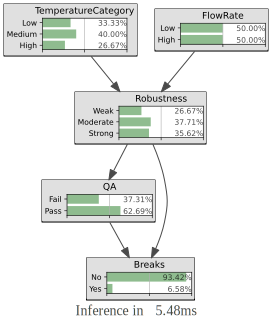

Marginal probability that a product breaks (based on Bayesian network structure): 0.0658
Marginal probability that a product breaks (validation using lazy propagation): 0.0658


In [8]:
# Add nodes to pre-made Bayesian Network (Made in Question 1(b))
flow_rate = bn_FastMade.add(gum.LabelizedVariable("FlowRate", "Flow Rate", ["Low", "High"]))
robustness = bn_FastMade.add(gum.LabelizedVariable("Robustness", "Robustness", ["Weak", "Moderate", "Strong"]))
qa = bn_FastMade.add(gum.LabelizedVariable("QA", "Quality Assurance Pass", ["Fail", "Pass"]))
breaks = bn_FastMade.add(gum.LabelizedVariable("Breaks", "Breaks", ["No", "Yes"]))

# Link nodes based on the Bayesian Network Structure as shown above
bn_FastMade.addArc(temp_category, robustness)
bn_FastMade.addArc(flow_rate, robustness)
bn_FastMade.addArc(robustness, qa)
bn_FastMade.addArc(qa, breaks)
bn_FastMade.addArc(robustness, breaks)

#  Define conditional probability tables

## P(TemperatureCategory)
"""Already done in Question 1(b)"""

## Frequency of FlowRate
flowrate_cnt = df["FlowRate"].value_counts()

## Compute P(FlowRate)
total_samples_cnt = len(df)
p_flowrate = flowrate_cnt / total_samples_cnt
bn_FastMade.cpt(flow_rate).fillWith(([p_flowrate["Low"], p_flowrate["High"]]))

## P(Robustness | TemperatureCategory, FlowRate)
""" Mapping P(Robustness | TemperatureCategory, FlowRate) found in question 2(b) """
bn_FastMade.cpt(robustness)[{"TemperatureCategory": 0, "FlowRate": 0}] = [0.6, 0.4, 0]  # Low Temp, Low Flow
bn_FastMade.cpt(robustness)[{"TemperatureCategory": 0, "FlowRate": 1}] = [1, 0, 0]  # Low Temp, High Flow
bn_FastMade.cpt(robustness)[{"TemperatureCategory": 1, "FlowRate": 0}] = [0, 0.2857, 0.7143] # Medium Temp, Low Flow
bn_FastMade.cpt(robustness)[{"TemperatureCategory": 1, "FlowRate": 1}] = [0, 1, 0]  # Medium Temp, High Flow
bn_FastMade.cpt(robustness)[{"TemperatureCategory": 2, "FlowRate": 0}] = [0, 0, 1]  # High Temp, Low Flow
bn_FastMade.cpt(robustness)[{"TemperatureCategory": 2, "FlowRate": 1}] = [0, 0.4, 0.6]  # High Temp, High Flow

## P(QA | Robustness)
""" Mapping P(QA | Robustness) found in question 2 statement """
bn_FastMade.cpt(qa)[{"Robustness": 0}] = [0.7, 0.3]  # Weak Robustness
bn_FastMade.cpt(qa)[{"Robustness": 1}] = [0.4, 0.6]  # Moderate Robustness
bn_FastMade.cpt(qa)[{"Robustness": 2}] = [0.1, 0.9]  # Strong Robustness

## P(Breaks | Robustness, QA = Passed)
"""Mapping P(Breaks | Robustness, QA) found in question 2 statement for when a product passes QA"""
bn_FastMade.cpt(breaks)[{"Robustness": 0, "QA": 1}] = [0.5, 0.5]  # Weak Robustness, Pass QA
bn_FastMade.cpt(breaks)[{"Robustness": 1, "QA": 1}] = [0.9, 0.1]  # Moderate Robustness, Pass QA
bn_FastMade.cpt(breaks)[{"Robustness": 2, "QA": 1}] = [0.99, 0.01]  # Strong Robustness, Pass QA

## P(Breaks | Robustness, QA = Failed) – If QA fails, it is discarded (not counted as breaking)
bn_FastMade.cpt(breaks)[{"Robustness": 0, "QA": "Fail"}] = [1.0, 0.0]
bn_FastMade.cpt(breaks)[{"Robustness": 1, "QA": "Fail"}] = [1.0, 0.0]
bn_FastMade.cpt(breaks)[{"Robustness": 2, "QA": "Fail"}] = [1.0, 0.0]

# Visualise the inference results
gnb.showInference(bn_FastMade)

# Print the results
print("Marginal probability that a product breaks (based on Bayesian network structure): 0.0658")

## Validation
## P(Breaks) using LazyPropagation
inference_lazy_bn_FastMade = gum.LazyPropagation(bn_FastMade)
inference_lazy_bn_FastMade.makeInference()
p_break = inference_lazy_bn_FastMade.posterior(breaks)[1] # Probability that Breaks = "Yes"

# Print the results
print(f"Marginal probability that a product breaks (validation using lazy propagation): {round(p_break,4)}")


<br>

b) A product is made using a component produced with high flow rate. The product breaks. What
is the probability that it was Strongly robust? **(5 pts)**

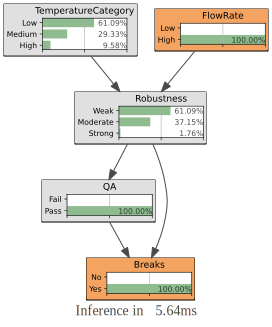

P(Robustness = Strong | FlowRate = High, Breaks = Yes) (based on Bayesian network structure): 0.0176
P(Robustness = Strong | FlowRate = High, Breaks = Yes) (validation using lazy propagation): 0.0176


In [9]:
# Visualise the inference results
gnb.showInference(bn_FastMade, evs = {'FlowRate':'High', 'Breaks':'Yes'})

# Print result
print("P(Robustness = Strong | FlowRate = High, Breaks = Yes) (based on Bayesian network structure): 0.0176")

# Validation
# Set evidence – FlowRate = High, Breaks = Yes
inference_lazy_bn_FastMade.setEvidence({"FlowRate": 1, "Breaks": 1})
inference_lazy_bn_FastMade.makeInference()

# Compute P(Robustness = Strong | FlowRate = High, Breaks = Yes)
p_RisStrong_given_HighFlow_Breaks = inference_lazy_bn_FastMade.posterior(robustness)[2]

# Print result
print(f"P(Robustness = Strong | FlowRate = High, Breaks = Yes) (validation using lazy propagation): {p_RisStrong_given_HighFlow_Breaks:0.4f}")


<br>

c) What is the relative risk of products breaking if produced at low versus high temperature? **(5
pts)**

$$
Relative \ risk = \frac{P(Breaks \ | \ TemperatureCategory=Low)}{P(Breaks \ | \ TemperatureCategory = High)}
$$

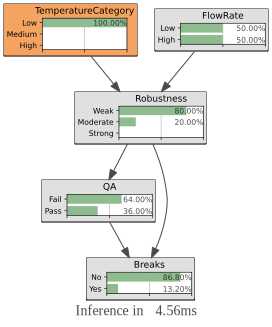

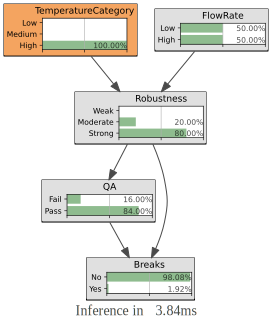

P(Breaks | TemperatureCategory = Low): 0.1320
P(Breaks | TemperatureCategory = High): 0.0192
Relative risk of products breaking if produced at low versus high temperature (based on Bayesian network structure): 6.8750 

Validation using lazy propagation
P(Breaks | TemperatureCategory = Low): 0.1320
P(Breaks | TemperatureCategory = High): 0.0192
Relative risk: 6.8750


'Products produced at low temperature are 6.8750 times more likely to break than those produced at high temperature'

In [10]:
# Visualise the inference results
gnb.showInference(bn_FastMade, evs = {'TemperatureCategory':'Low'})
gnb.showInference(bn_FastMade, evs = {'TemperatureCategory':'High'})

# Print result
print(f"P(Breaks | TemperatureCategory = Low): {0.1320:0.4f}")
print(f"P(Breaks | TemperatureCategory = High): {0.0192}")
print(f"Relative risk of products breaking if produced at low versus high temperature (based on Bayesian network structure): {13.20/1.92:0.4f} \n") 

# Validation
# Compute P(Breaks | TemperatureCategory = Low)
inference_lazy_bn_FastMade.setEvidence({"TemperatureCategory": 0}) # Low temperature
inference_lazy_bn_FastMade.makeInference()
p_Breaks_given_LowTemp = inference_lazy_bn_FastMade.posterior(breaks)[1] # P(Breaks = Yes)

# Compute P(Breaks | TemperatureCategory = High)
inference_lazy_bn_FastMade.setEvidence({"TemperatureCategory": 2}) # High temperature
inference_lazy_bn_FastMade.makeInference()
p_Breaks_given_HighTemp = inference_lazy_bn_FastMade.posterior(breaks)[1] # P(Breaks = Yes)

# Compute relative risk
relative_risk = p_Breaks_given_LowTemp / p_Breaks_given_HighTemp

# Print results
print("Validation using lazy propagation")
print(f"P(Breaks | TemperatureCategory = Low): {p_Breaks_given_LowTemp:0.4f}")
print(f"P(Breaks | TemperatureCategory = High): {p_Breaks_given_HighTemp:0.4f}")
print(f"Relative risk: {relative_risk:0.4f}")

"""Products produced at low temperature are 6.8750 times more likely to break than those produced at high temperature"""

<br>

---

<br>

### Question 4

Lisa is considering dropping the quality assurance process. If a product is not discarded, she can
sell it for £2,000. However, if the product breaks, she may have to pay a compensation worth
£10,000.

<br>

a) Draw an influence diagram representing this situation in PyAgrum **(5 pts)**

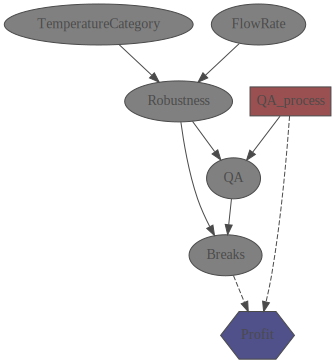

In [11]:
# Draw an influence diagram for Lisa
id_Lisa = gum.InfluenceDiagram()

# Add decision node (represented in rectangle) – Whether QA process is kept or dropped
qa_process = id_Lisa.addDecisionNode(gum.LabelizedVariable("QA_process", "Use QA Process", ["Keep", "Drop"])) 

# Add chance nodes (represented in ovals)
tempcategory = id_Lisa.addChanceNode(gum.LabelizedVariable("TemperatureCategory", "TemperatureCategory", ["Low", "Medium", "High"]))
flowrate = id_Lisa.addChanceNode(gum.LabelizedVariable("FlowRate", "Flow Rate", ["Low", "High"]))
robustness = id_Lisa.addChanceNode(gum.LabelizedVariable("Robustness", "Product Robustness", ["Weak", "Moderate", "Strong"]))
passesQA = id_Lisa.addChanceNode(gum.LabelizedVariable("QA", "PassesQA", ["Fail", "Pass"]))
breaks = id_Lisa.addChanceNode(gum.LabelizedVariable("Breaks", "Product Breaks", ["No", "Yes"]))

# Add utility node (represented in hexagon)
profit = id_Lisa.addUtilityNode("Profit") # Represents cost or benefit of Lisa's decision

# Define dependencies (represented in arcs)
id_Lisa.addArc(tempcategory, robustness) # TemperatureCategory affects Robustness
id_Lisa.addArc(flowrate, robustness) # Flowrate affects Robustness

id_Lisa.addArc(robustness, passesQA) # Robustness affects pass rate
id_Lisa.addArc(qa_process, passesQA) # QA affects whether a product passes

id_Lisa.addArc(passesQA, breaks) # Only passed products can break (otherwise, is discarded)
id_Lisa.addArc(robustness, breaks) # Robustness affects breakage probability
id_Lisa.addArc(breaks, profit) # Breakage affects profit
id_Lisa.addArc(qa_process, profit) # QA decision affects financial outcome


# Show the influence diagram
gnb.showInfluenceDiagram(id_Lisa)

<br>

b) Should Lisa keep the QA process? How much does she stand to make on average per product,
if she does? **(5 pts)**

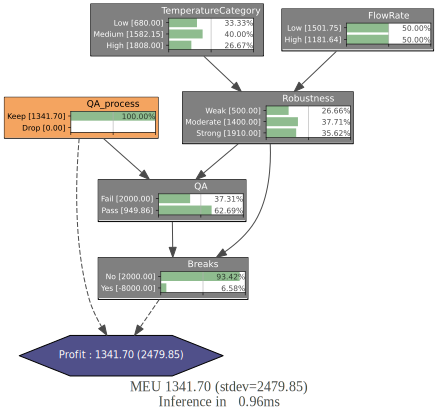

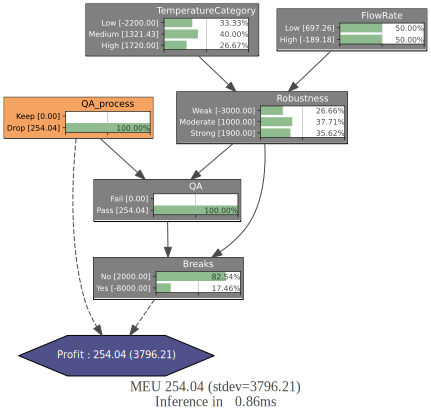

If Lisa keeps the QA process, her expected average profit per product is £1341.7. In contrast, if she drops the QA process, her expected earnings decrease to £254.04
Therefore, by keeping the QA process, she stands to gain an additional £1087.66 per product, making it the more advantageous choice.


In [12]:
# Define Conditional Probability Tables

## P(TemperatureCategory)
id_Lisa.cpt(tempcategory).fillWith([0.3333,	0.4000,	0.2667])

## P(FlowRate)
id_Lisa.cpt(flowrate).fillWith(([0.5, 0.5]))

## P(Robustness | TemperatureCategory, FlowRate)
""" Mapping P(Robustness | TemperatureCategory, FlowRate) found in question 2(b) """
id_Lisa.cpt(robustness)[{"TemperatureCategory": 0, "FlowRate": 0}] = [0.6, 0.4, 0]  # Low Temp, Low Flow
id_Lisa.cpt(robustness)[{"TemperatureCategory": 0, "FlowRate": 1}] = [1, 0, 0]  # Low Temp, High Flow
id_Lisa.cpt(robustness)[{"TemperatureCategory": 1, "FlowRate": 0}] = [0, 0.2857, 0.7143] # Medium Temp, Low Flow
id_Lisa.cpt(robustness)[{"TemperatureCategory": 1, "FlowRate": 1}] = [0, 1, 0]  # Medium Temp, High Flow
id_Lisa.cpt(robustness)[{"TemperatureCategory": 2, "FlowRate": 0}] = [0, 0, 1]  # High Temp, Low Flow
id_Lisa.cpt(robustness)[{"TemperatureCategory": 2, "FlowRate": 1}] = [0, 0.4, 0.6]  # High Temp, High Flow

## P(QA | Robustness)
""" Mapping P(QA | Robustness) found in question 2 statement """
# P(PassesQA | Robustness, QA_process)
id_Lisa.cpt(passesQA)[{"Robustness": "Weak", "QA_process": "Keep"}] = [0.7, 0.3] # 30% pass
id_Lisa.cpt(passesQA)[{"Robustness": "Moderate", "QA_process": "Keep"}] = [0.4, 0.6] # 60% pass
id_Lisa.cpt(passesQA)[{"Robustness": "Strong", "QA_process": "Keep"}] = [0.1, 0.9] # 90% pass

# If QA is dropped, all products are sold (100% as she skips QA)
id_Lisa.cpt(passesQA)[{"Robustness": "Weak", "QA_process": "Drop"}] = [0, 1]
id_Lisa.cpt(passesQA)[{"Robustness": "Moderate", "QA_process": "Drop"}] = [0, 1]
id_Lisa.cpt(passesQA)[{"Robustness": "Strong", "QA_process": "Drop"}] = [0, 1]

## P(Breaks | Robustness, QA = Passed)
"""Mapping P(Breaks | Robustness, QA) found in question 2 statement for when a product passes QA"""
id_Lisa.cpt(breaks)[{"Robustness": 0, "QA": 1}] = [0.5, 0.5]  # Weak Robustness, Pass QA
id_Lisa.cpt(breaks)[{"Robustness": 1, "QA": 1}] = [0.9, 0.1]  # Moderate Robustness, Pass QA
id_Lisa.cpt(breaks)[{"Robustness": 2, "QA": 1}] = [0.99, 0.01]  # Strong Robustness, Pass QA

## P(Breaks | Robustness, QA = Failed) – If QA fails, it is discarded (not counted as breaking)
id_Lisa.cpt(breaks)[{"Robustness": 0, "QA": "Fail"}] = [1, 0]
id_Lisa.cpt(breaks)[{"Robustness": 1, "QA": "Fail"}] = [1, 0]
id_Lisa.cpt(breaks)[{"Robustness": 2, "QA": "Fail"}] = [1, 0]

# P(Breaks | Robustness, QA = Passed) – Stated in the question statement
id_Lisa.cpt(breaks)[{"Robustness": "Weak", "QA": "Pass"}] = [0.5, 0.5]  # 50% break
id_Lisa.cpt(breaks)[{"Robustness": "Moderate", "QA": "Pass"}] = [0.9, 0.1]  # 10% break
id_Lisa.cpt(breaks)[{"Robustness": "Strong", "QA": "Pass"}] = [0.99, 0.01]  # 1% break

# Define Utility Function (Profit)

# Financial values
profit_if_no_break = 2000 # Profit per product if it does not break
loss_if_break = 2000 - 10000 # Loss per product if it breaks (sold at £2000 but needs to be compensated: -£10000)

# Profit when product does not break
id_Lisa.utility(profit)[{"Breaks": "No"}] = profit_if_no_break

# Compensation loss if product breaks
id_Lisa.utility(profit)[{"Breaks": "Yes"}] = loss_if_break

# Display probability tables and utility values for verification
gnb.sideBySide(id_Lisa.cpt(tempcategory), id_Lisa.cpt(flowrate))
gnb.sideBySide(id_Lisa.cpt(robustness), id_Lisa.cpt(passesQA), id_Lisa.cpt(breaks))
gnb.sideBySide(id_Lisa.utility(profit))

# Visualise the inference results when she keeps the QA process
gnb.showInference(id_Lisa, evs = {'QA_process':'Keep'})

# Visualise the inference results when she drops the QA process
gnb.showInference(id_Lisa, evs = {'QA_process':'Drop'})

# Compare the results
print(f"If Lisa keeps the QA process, her expected average profit per product is £{1341.70}. In contrast, if she drops the QA process, her expected earnings decrease to £{254.04}")
print(f"Therefore, by keeping the QA process, she stands to gain an additional £{1341.70-254.04} per product, making it the more advantageous choice.")

<br>

c) After analysing their data, FastMade improves their control over the printing process. They
ensure that all samples are printed at low flow rate, as this improves robustness. How much is this
improvement worth to Lisa (per product)? **(5 pts)**

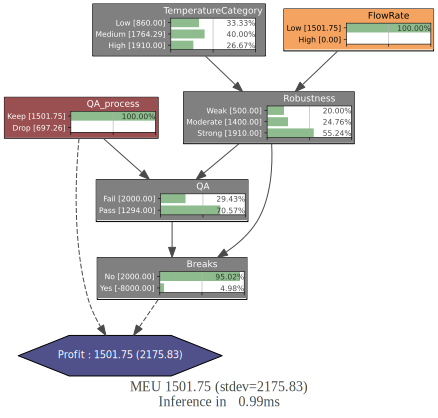

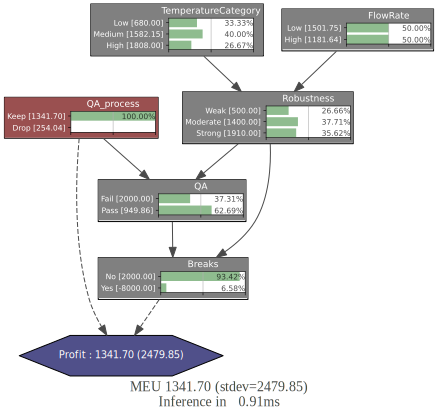

When all samples are printed at low flow rate, Lisa is expected to earn £1501.75, whereas when samples are being printed at both low and high flow rate, she is expected to earn £1341.7. 
Hence, she benefits £160.05 by this improvement.


In [13]:
# Visualise the influence results when all samples are printed at low flow rate
gnb.showInference(id_Lisa, evs = {'FlowRate': 'Low'})

# Visualise the influence results when samples are printed at both low and high flow rate
gnb.showInference(id_Lisa)

# Compare the results
print(f"When all samples are printed at low flow rate, Lisa is expected to earn £{1501.75}, whereas when samples are being printed at both low and high flow rate, \
she is expected to earn £{1341.70}. \nHence, she benefits £{1501.75 - 1341.70:0.2f} by this improvement.")


<br>

d) FastMade also offers Lisa to share their data on temperature category, allowing her to bypass
QA selectively for products made at low, medium, or high temperatures. That is, she could decide
to carry out QA only for products made at medium temperature – or high, low, or some
combination of the three. Will she benefit from this? How much is sharing this information worth
to Lisa (per product)? Assume all components are still produced using a low flow rate. **(5 pts)**

Inference result when Lisa decides to carry out QA for products made at low temperature


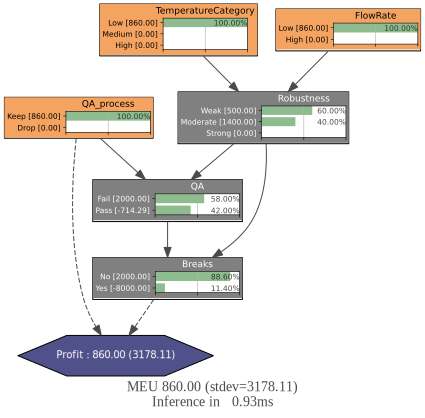

Inference result when Lisa decides to drop QA for products made at low temperature


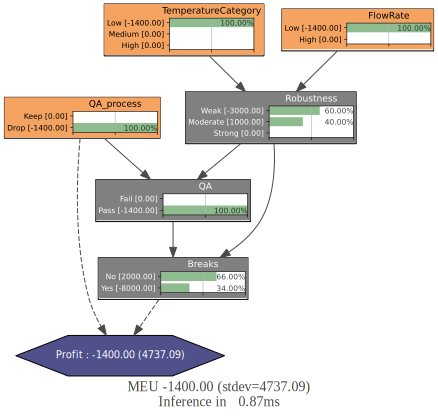

When Lisa is aware that the products were made at low temperature, keeping the QA process results in a profit of £860, whereas dropping the QA process leads to a loss of £1400. 
By keeping the QA process, she gains £2260.00 more per product compared to dropping it. 
Therefore, keeping the QA process is the more beneficial choice when she knows the products were made at low temperature.


In [14]:
# Visualise the inference result when Lisa decides to carry out QA for products made at low temperature
print("Inference result when Lisa decides to carry out QA for products made at low temperature")
gnb.showInference(id_Lisa, evs = {'FlowRate': 'Low', 'TemperatureCategory':'Low', 'QA_process': 'Keep'})

# Visualise the inference result when Lisa decides to drop QA for products made at low temperature
print("Inference result when Lisa decides to drop QA for products made at low temperature")
gnb.showInference(id_Lisa, evs = {'FlowRate': 'Low', 'TemperatureCategory':'Low', 'QA_process': 'Drop'})

# Compare the expected profit 
print(f"When Lisa is aware that the products were made at low temperature, keeping the QA process results in a profit of £{860}, whereas dropping the QA process leads to a loss of £{1400}. \
\nBy keeping the QA process, she gains £{860+1400:0.2f} more per product compared to dropping it. \
\nTherefore, keeping the QA process is the more beneficial choice when she knows the products were made at low temperature.")

# Assign expected profit of knowing that the products were made at low temperature and she keeps QA
EP_low_temp = 860

Inference result when Lisa decides to carry out QA for products made at medium temperature


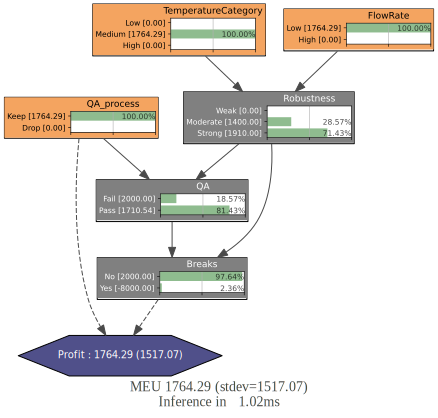

Inference result when Lisa decides to drop QA for products made at medium temperature


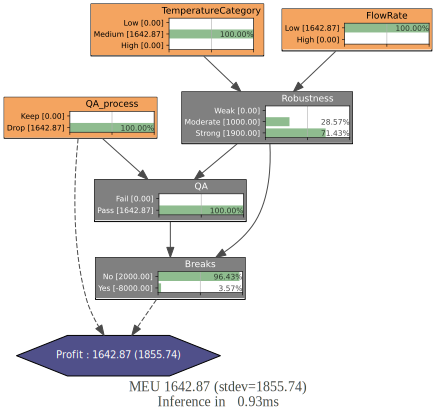

When Lisa is aware that the products were made at medium temperature, keeping the QA process results in a profit of £1764.29, whereas dropping the QA process leads to a profit of £1642.87. 
By keeping the QA process, she gains £121.42 more per product compared to dropping it. 
Therefore, keeping the QA process is the more beneficial choice when she knows the products were made at medium temperature.


In [15]:
# Visualise the inference result when Lisa decides to carry out QA for products made at medium temperature
print("Inference result when Lisa decides to carry out QA for products made at medium temperature")
gnb.showInference(id_Lisa, evs = {'FlowRate': 'Low', 'TemperatureCategory':'Medium', 'QA_process': 'Keep'})

# Visualise the inference result when Lisa decides to drop QA for products made at medium temperature
print("Inference result when Lisa decides to drop QA for products made at medium temperature")
gnb.showInference(id_Lisa, evs = {'FlowRate': 'Low', 'TemperatureCategory':'Medium', 'QA_process': 'Drop'})

# Compare the expected profit 
print(f"When Lisa is aware that the products were made at medium temperature, keeping the QA process results in a profit of £{1764.29}, whereas dropping the QA process leads to a profit of £{1642.87}. \
\nBy keeping the QA process, she gains £{1764.29-1642.87:0.2f} more per product compared to dropping it. \
\nTherefore, keeping the QA process is the more beneficial choice when she knows the products were made at medium temperature.")

# Assign expected profit of knowing that the products were made at medium temperature and she keeps QA
EP_med_temp = 1764.29

Inference result when Lisa decides to carry out QA for products made at high temperature


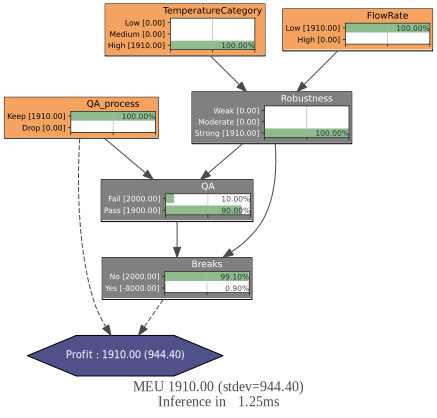

Inference result when Lisa decides to drop QA for products made at high temperature


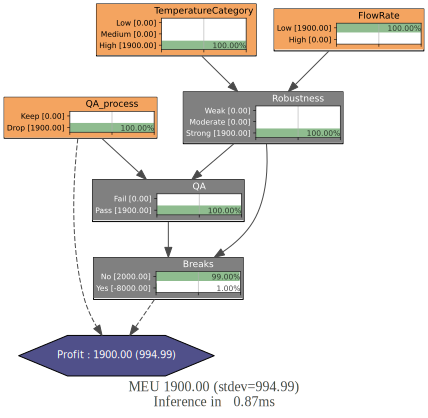

When Lisa is aware that the products were made at high temperature, keeping the QA process results in a profit of £1910.0, whereas dropping the QA process leads to a profit of £1900.0. 
By keeping the QA process, she gains £10.00 more per product compared to dropping it. 
Therefore, keeping the QA process is the more beneficial choice when she knows the products were made at high temperature.


In [16]:
# Visualise the inference result when Lisa decides to carry out QA for products made at high temperature
print("Inference result when Lisa decides to carry out QA for products made at high temperature")
gnb.showInference(id_Lisa, evs = {'FlowRate': 'Low', 'TemperatureCategory':'High', 'QA_process': 'Keep'})

# Visualise the inference result when Lisa decides to drop QA for products made at high temperature
print("Inference result when Lisa decides to drop QA for products made at high temperature")
gnb.showInference(id_Lisa, evs = {'FlowRate': 'Low', 'TemperatureCategory':'High', 'QA_process': 'Drop'})

# Compare the expected profit 
print(f"When Lisa is aware that the products were made at high temperature, keeping the QA process results in a profit of £{1910.00}, whereas dropping the QA process leads to a profit of £{1900.00}. \
\nBy keeping the QA process, she gains £{1910.00-1900.00:0.2f} more per product compared to dropping it. \
\nTherefore, keeping the QA process is the more beneficial choice when she knows the products were made at high temperature.")

# Assign expected profit of knowing that the products were made at high temperature and she keeps QA
EP_high_temp = 1910.00

In [17]:
# Conclusion
print(f"Based on previous steps, it can be concluded that no matter what temperature category the product is from, it is always better to perform QA. \
      \nSince all individual cases (Low, Medium, and High) temperature favour keeping QA, the best strategy for Lisa is to keep QA for all products.")

# P(TemperatureCategory)
p_low_temp = 0.3333
p_med_temp = 0.4000
p_high_temp = 0.2667

# Compute total expected utility
EP_given_temp = EP_low_temp * p_low_temp + EP_med_temp * p_med_temp + EP_high_temp * p_high_temp

# Print the total expected utility
print(f"\nBy doing so, Lisa is expected to earn £{EP_given_temp:0.2f}")

Based on previous steps, it can be concluded that no matter what temperature category the product is from, it is always better to perform QA.       
Since all individual cases (Low, Medium, and High) temperature favour keeping QA, the best strategy for Lisa is to keep QA for all products.

By doing so, Lisa is expected to earn £1501.75


Inference result when the temperature category data is not shared with Lisa


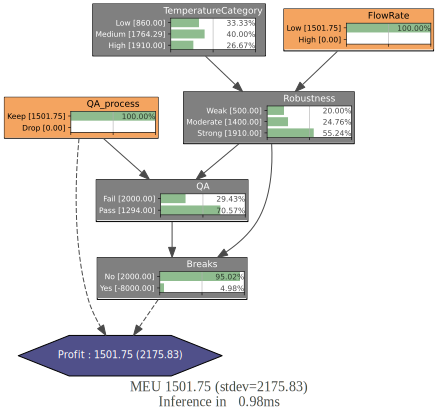

As shown above, Lisa is expected to earn £1501.75 when she lacks information about the temperature category.       
When compared to the expected utility in the scenario where she has access to this data, she also earns £1501.75       
It becomes evident that having or not having knowledge of the temperature category does not impact the total expected utility.       
Consequently, she gains no advantage from possessing this information.


In [18]:
# Visualise the inference result when the temperature category data is not shared with Lisa
print("Inference result when the temperature category data is not shared with Lisa")
gnb.showInference(id_Lisa, evs = {'FlowRate': 'Low', 'QA_process': 'Keep'})

# Compare Lisa's total expected utility for when she is not offered the temperature category data versus she is offered the temperature category data
print(f"As shown above, Lisa is expected to earn £{1501.75} when she lacks information about the temperature category. \
      \nWhen compared to the expected utility in the scenario where she has access to this data, she also earns £{1501.75} \
      \nIt becomes evident that having or not having knowledge of the temperature category does not impact the total expected utility. \
      \nConsequently, she gains no advantage from possessing this information.")

<br>

---

<br>

### Question 5

You are analysing the effectiveness of two drugs, A and B, used to treat a specific condition.
Depending on how early the condition is diagnosed, doctors tend to choose a different drug.
60% of cases are discovered early, and 40% are discovered late. When diagnosed early, patients
are in 90% of cases given drug A; when diagnosed late, patients are given drug A 40% of the
time.

Recovery rates depend on discovery time, and on which drug was used. When diagnosed early
and given drug A, 80% of patients recover. For early diagnosis and drug B, 90% recover. In the
case of late diagnosis, 50% of patients recover with drug A, and 60% with drug B.

<br>

a) Draw a Bayesian network showing this situation in PyAgrum **(5 pts)**

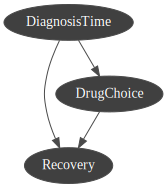

In [19]:
# Create a Bayesian Network
bn_drug = gum.BayesNet("DrugEffectiveness")

# Add nodes
diagnosis = bn_drug.add(gum.LabelizedVariable("DiagnosisTime", "DiagnosisTime", ["Early" , "Late"]))
drug = bn_drug.add(gum.LabelizedVariable("DrugChoice", "DrugChoice", ["Drug A", "Drug B"]))
recovery = bn_drug.add(gum.LabelizedVariable("Recovery", "Recovery Status", ["Recovered", "Not_Recovered"]))

# Link nodes using arcs
bn_drug.addArc(diagnosis, drug) # Diagnosis affects drug choice
bn_drug.addArc(diagnosis, recovery) # Diagnosis affects recovery
bn_drug.addArc(drug, recovery) # Drug  choice affects recovery

# Define probability tables
bn_drug.cpt(diagnosis).fillWith([0.6, 0.4]) # P(Early) = 0.6, P(Late) = 0.4

bn_drug.cpt(drug)[{"DiagnosisTime": "Early"}] = [0.9, 0.1] # P(A | Early) = 0.9, P(B | Early) = 0.1
bn_drug.cpt(drug)[{"DiagnosisTime": "Late"}] = [0.4, 0.6] # P(A | Late) = 0.4, P(B | Late) = 0.6

bn_drug.cpt(recovery)[{"DiagnosisTime": "Early", "DrugChoice": "Drug A"}] = [0.8, 0.2]
bn_drug.cpt(recovery)[{"DiagnosisTime": "Early", "DrugChoice": "Drug B"}] = [0.9, 0.1]
bn_drug.cpt(recovery)[{"DiagnosisTime": "Late", "DrugChoice": "Drug A"}] = [0.5, 0.5]
bn_drug.cpt(recovery)[{"DiagnosisTime": "Late", "DrugChoice": "Drug B"}] = [0.6, 0.4]

# Display the Bayesian Network diagram
gnb.showBN(bn_drug)

# Display probability tables
gnb.sideBySide(bn_drug.cpt(diagnosis), bn_drug.cpt(drug))
gnb.sideBySide(bn_drug.cpt(recovery))

<br>

b) What are the absolute risks of not recovering for each drug? **(5 pts)**

In [20]:
# Given probabilities
p_Early = 0.6
p_Late = 0.4

p_A_given_Early = 0.9
p_B_given_Early = 0.1
p_A_given_Late = 0.4
p_B_given_Late = 0.6

p_NotRecovered_given_A_Early = 1 - 0.8 # 0.2
p_NotRecovered_given_A_Late = 1 - 0.5 # 0.5
p_NotRecovered_given_B_Early = 1 - 0.9 # 0.1
p_NotRecovered_given_B_Late = 1 - 0.6 # 0.4

# Compute P(Drug A) and P(Drug B) using the law of total probability
p_A = (p_A_given_Early * p_Early) + (p_A_given_Late * p_Late)
p_B = (p_B_given_Early * p_Early) + (p_B_given_Late * p_Late)

# Compute P(Early | Drug A), P(Late | A), P(Early | B), P(Late | B) using Bayes' Theorem
p_Early_given_A = (p_A_given_Early * p_Early) / p_A
p_Late_given_A = (p_A_given_Late * p_Late) / p_A
p_Early_given_B = (p_B_given_Early * p_Early) / p_B
p_Late_given_B = (p_B_given_Late * p_Late) / p_B

# Compute absolute risks
p_NotRecovered_given_A = (p_NotRecovered_given_A_Early * p_Early_given_A) + \
                         (p_NotRecovered_given_A_Late * p_Late_given_A)

p_NotRecovered_given_B = (p_NotRecovered_given_B_Early * p_Early_given_B) + \
                         (p_NotRecovered_given_B_Late * p_Late_given_B)

# Print results
print(f"Absolute risk of not recovering for drug A: {p_NotRecovered_given_A * 100: 0.4f}%")
print(f"Absolute risk of not recovering for drug B: {p_NotRecovered_given_B * 100: 0.4f}%")

Absolute risk of not recovering for drug A:  26.8571%
Absolute risk of not recovering for drug B:  34.0000%


<br>

c) Based on this, a doctor concludes that drug A is more effective. Is he right? If not, why? What is
the name of the phenomenon that mislead him? **(10 pts)**

The doctor concludes that Drug A is more effective based on its lower overall failure rates (26.88% vs. 34.00%). However, this conclusion is misleading because it does not account for diagnosis timing, which affects  
both drug assignment and recovery rates.

<br>

Looking at recovery rates within each diagnosis group:
- For early diagnosis:
    - Drug A: 80% recovery
    - Drug B: 90% recovery (Better)

- For late diagnosis:
    - Drug A: 50% recovery
    - Drug B: 60% recovery (Better)

<br>

In both cases, Drug B is the superior treatment, yet Drug A appears more effective overall. This discrepancy occurs because early-diagnosed patients (who have higher recovery rates) receive Drug A more often,  
inflating its overall success rate.  

<br>

This is a classic case of Simpson's Paradox, where an apparent trend in aggregated data reverses when analysed by subgroups.  
Drug A's higher overall success rate is due to it being disproportionately given to early-diagnosed patients, not because it is the better drug.

<br>

To confirm this effect mathematically, one can compute the true overall recovery rates for each drug by considering the proportion of early- and late-diagnosed patients receiving each treatment as shown below:

In [21]:
# Compute overall recovery rates for each drug
p_Recovered_given_A = (0.8 * p_Early_given_A) + (0.5 * p_Late_given_A)
p_Recovered_given_B = (0.9 * p_Early_given_B) + (0.6 * p_Late_given_B)

# Compute the absolute risk of not recovering
p_NotRecovered_given_A = 1 - p_Recovered_given_A
p_NotRecovered_given_B = 1 - p_Recovered_given_B

# Display the result
print(f"Drug A: {p_Recovered_given_A * 100:0.2f}% recovery, \
      {p_NotRecovered_given_A *  100:0.2f}% not recovering")

print(f"Drug B: {p_Recovered_given_B * 100:0.2f}% recovery, \
      {p_NotRecovered_given_B *  100:0.2f}% not recovering")

Drug A: 73.14% recovery,       26.86% not recovering
Drug B: 66.00% recovery,       34.00% not recovering


<br>

At first glance, this suggests Drug A is more effective. However, this result is misleading because Drug A is assigned more often to early-diagnosed patients, who naturally have higher recovery rates regardless of the drug.  
When analysing the correct subgroup comparisons, Drug B consistently outperforms Drug A.

The doctor's assessment is incorrect; The doctor's assessment was based on misleading aggregate statistics rather than a fair subgroup analysis. This happened because of Simpson's Paradox:
- When looking at each diagnosis group separately, Drug B consistently performs better
- When looking at all patients combined, Drug A appears to be more effective
    - but this is only because more early-diagnosed patients receive Drug A

<br>

A fair comparison must control for diagnosis timing.  
Since Drug B has a higher recovery rate in both early and late cases, it is the better treatment option.   